# Classification tree 

Here in this problem, decision tree is build using two criterion:1) Gini index 2) Entropy. after building a decision tree for the classification their accuracy to classify each data , no of nodes , no of leaf and decision tree plot is obtained by using following code.

In [1]:
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as met
import sklearn.model_selection as sms
import matplotlib.pyplot as plt
import graphviz

# Importing Data

In [2]:
# importing the data from the .csv files 

# data for training
data_train = np.genfromtxt('trainX.csv',delimiter=',')
label_train = np.genfromtxt('trainY.csv',delimiter=',' )

#data for testing
data_test = np.genfromtxt('testX.csv',delimiter=',')
label_test = np.genfromtxt('testY.csv',delimiter=',' )

In [3]:
# counting the no. of data points in each class

count0 = 0
count1 = 0
for i in range(len(label_train)):
    if label_train[i]==0:
        count0 +=1
    else:
        count1 +=1
print("no. of data points in class0 are : ",count0)
print(" ")
print("no. of data points in class1 are : ",count1)

no. of data points in class0 are :  286
 
no. of data points in class1 are :  169


# 1. Building a classification tree  using criterion Gini

In [4]:
#classification tree initialization
tree_g = DecisionTreeClassifier(criterion='gini', random_state= 10)

# classification tree generation
tree_g = tree_g.fit(data_train,label_train)

#using the tree, prediction of test data
label_predict = tree_g.predict(data_test)

# Calculation of various parameters

In [5]:
#calculation the confusion matrix
c_m = met.confusion_matrix(label_test, label_predict)
print("The confusion matrix is : ")
print(c_m)
print(" ")

#estimation of classification rate for classes
print("Classification accuracy for class 0 :", 100*(c_m[0][0]/(c_m[0][0]+c_m[0][1])),"%")
print(" ")
print("Classification accuracy for class 1 :", 100*(c_m[1][1]/(c_m[1][0]+c_m[1][1])),"%")
print(" ")
accu_all = 100*met.accuracy_score(label_test, label_predict)
print("Overall classification accuracy for the test data is : ",100*met.accuracy_score(label_test, label_predict),"%")


The confusion matrix is : 
[[28  4]
 [ 4 21]]
 
Classification accuracy for class 0 : 87.5 %
 
Classification accuracy for class 1 : 84.0 %
 
Overall classification accuracy for the test data is :  85.96491228070175 %


# (a) Decision Tree Model

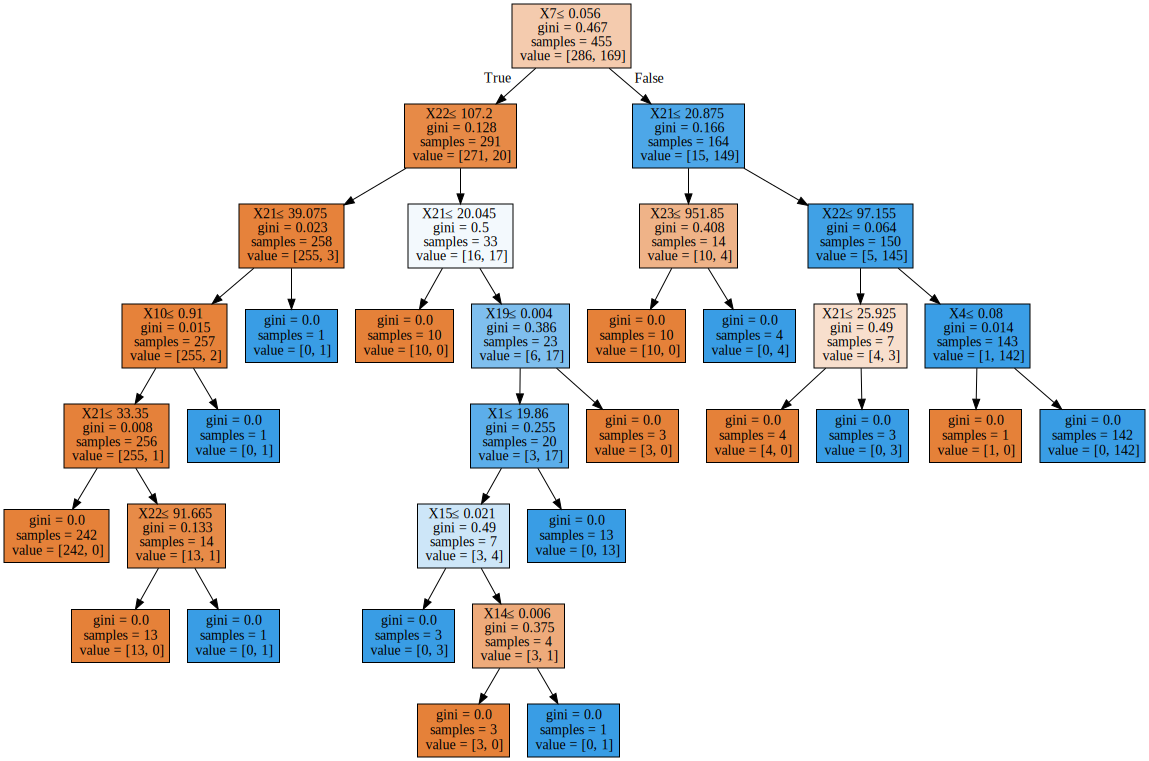

In [6]:
data = tree.export_graphviz(tree_g,  out_file=None, max_depth=None, feature_names=None, class_names=None, label='all', filled=True, leaves_parallel=False, impurity=True, node_ids=False, proportion=False, rotate=False, rounded=False, special_characters=True, precision=3) 
graph = graphviz.Source(data)
graph

#  (b) Total no. of nodes in a tree

In [7]:
print("Total no. of nodes in a tree are : ", tree_g.tree_.node_count)

Total no. of nodes in a tree are :  33


#  (c) Total no of leaf nodes in a tree

In [8]:
# Calculation of total no of leaf nodes
tree_l=tree_g.tree_.__getstate__()['nodes']
leaf=0
for i in tree_l:
    if i[0]==-1 and i[1]==-1:
        leaf=leaf+1
print("Total no of leaf nodes are :  ",leaf)

Total no of leaf nodes are :   17


#  Part II 

Now in part II , fraction of data is choosen to build a decision tree for classification. Variation in Total classification accuracy is plotted against the fraction of data used to build a tree. the decision tree is tested upon the test data.

In [9]:
# Initializing arrays to store the values of accuracy and fraction.
frac = []
accuracy=[]

# Iterating through the whole data set given a stepsize of 10%.
for i in range(1,10):
    perc = i/10.0
    frac.append(100*perc)
    data_train_1,data_left,label_train_1,label_left = sms.train_test_split(data_train, label_train, train_size=perc,test_size= 1-perc, random_state=10)
    tree_g = DecisionTreeClassifier(criterion='gini',random_state=10)
    tree_g = tree_g.fit(data_train_1,label_train_1)
    label_predict = tree_g.predict(data_test)
    accuracy.append(100*met.accuracy_score(label_test, label_predict))
    print("Using ",frac[i-1],"% data, the accuracy of classification is : ", accuracy[i-1]) 
    print(" ")

frac.append(100)
accuracy.append(accu_all)
print("Using 100% data, the accuracy of classification is : ",accu_all)

Using  10.0 % data, the accuracy of classification is :  80.7017543859649
 
Using  20.0 % data, the accuracy of classification is :  82.45614035087719
 
Using  30.0 % data, the accuracy of classification is :  82.45614035087719
 
Using  40.0 % data, the accuracy of classification is :  82.45614035087719
 
Using  50.0 % data, the accuracy of classification is :  85.96491228070175
 
Using  60.0 % data, the accuracy of classification is :  89.47368421052632
 
Using  70.0 % data, the accuracy of classification is :  84.21052631578947
 
Using  80.0 % data, the accuracy of classification is :  82.45614035087719
 
Using  90.0 % data, the accuracy of classification is :  94.73684210526315
 
Using 100% data, the accuracy of classification is :  85.96491228070175


from the above calculation , we found that using 90% of data will give me the highest accuracy. so now for this data calculation of no. of leaves and no of nodes will be deciding factor.

In [10]:
# calculations for 90% data 

data_train_2,data_left_3,label_train_2,label_left_3 = sms.train_test_split(data_train, label_train, train_size=perc,test_size= 1-perc, random_state=10)

#classification tree initialization
tree_5 = DecisionTreeClassifier(criterion='gini', random_state= 10)

# classification tree generation
tree_5 = tree_5.fit(data_train_2,label_train_2)

#using the tree, prediction of test data
label_predict = tree_g.predict(data_test)

print("Total no. of nodes in a tree are : ", tree_5.tree_.node_count)

# Calculation of total no of leaf nodes
tree_l1=tree_5.tree_.__getstate__()['nodes']
leaf=0
for i in tree_l1:
    if i[0]==-1 and i[1]==-1:
        leaf=leaf+1
print("Total no of leaf nodes are :  ",leaf)
print("Overall classification accuracy for the test data is : ",100*met.accuracy_score(label_test, label_predict),"%")


Total no. of nodes in a tree are :  27
Total no of leaf nodes are :   14
Overall classification accuracy for the test data is :  94.73684210526315 %


# Plot

Text(0,0.5,'%accuracy')

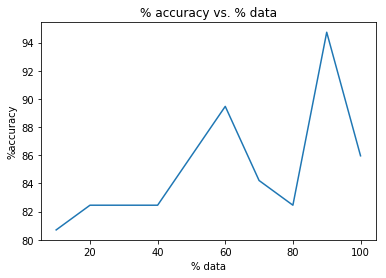

In [11]:
plt.plot(frac,accuracy)
plt.title(s="% accuracy vs. % data")
plt.xlabel(s='% data')
plt.ylabel(s='%accuracy')

#  2. Building a classification tree using criterion Entropy

#  Importing Data

In [12]:
# importing the data from the .csv files 

# data for training
data_train = np.genfromtxt('trainX.csv',delimiter=',')
label_train = np.genfromtxt('trainY.csv',delimiter=',' )

#data for testing
data_test = np.genfromtxt('testX.csv',delimiter=',')
label_test = np.genfromtxt('testY.csv',delimiter=',' )

# Classification Tree using Entropy 

In [13]:
#classification tree initialization
tree_e = DecisionTreeClassifier(criterion='entropy', random_state= 10)

# classification tree generation
tree_e = tree_e.fit(data_train,label_train)

#using the tree, prediction of test data
label_predict = tree_e.predict(data_test)

#  Calculation of various parameters

In [14]:
#calculation the confusion matrix
c_m = met.confusion_matrix(label_test, label_predict)
print("The confusion matrix is : ")
print(c_m)
print(" ")

#estimation of classification rate for classes
print("Classification accuracy for class 0 :", 100*(c_m[0][0]/(c_m[0][0]+c_m[0][1])),"%")
print(" ")
print("Classification accuracy for class 1 :", 100*(c_m[1][1]/(c_m[1][0]+c_m[1][1])),"%")
print(" ")
accu_all = 100*met.accuracy_score(label_test, label_predict)
print("Overall classification accuracy for the test data is : ",100*met.accuracy_score(label_test, label_predict),"%")


The confusion matrix is : 
[[32  0]
 [ 3 22]]
 
Classification accuracy for class 0 : 100.0 %
 
Classification accuracy for class 1 : 88.0 %
 
Overall classification accuracy for the test data is :  94.73684210526315 %


#  (a) Decision Tree Model

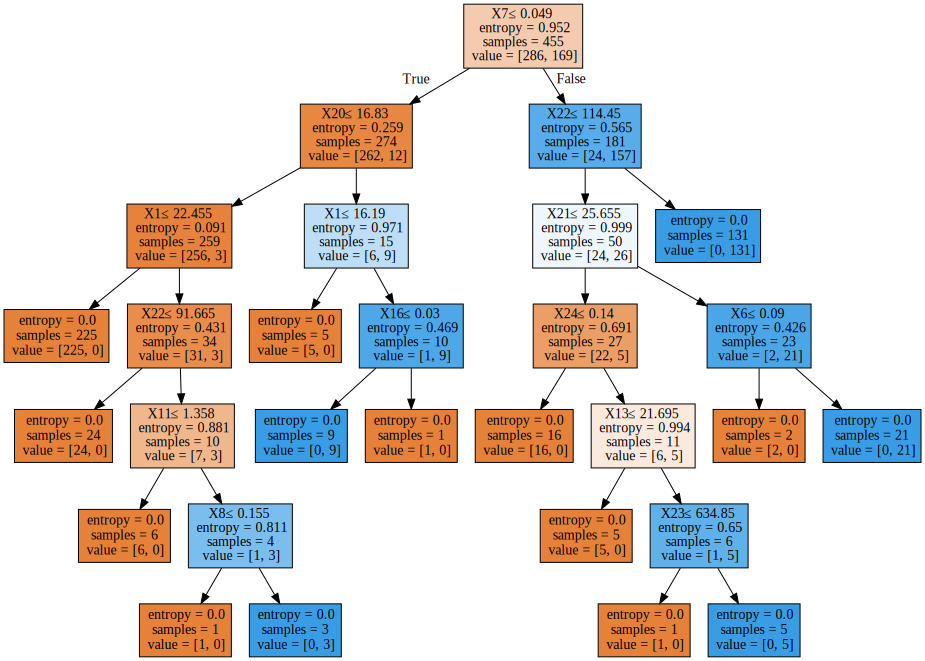

In [15]:
import graphviz
data = tree.export_graphviz(tree_e,  out_file=None, max_depth=None, feature_names=None, class_names=None, label='all', filled=True, leaves_parallel=False, impurity=True, node_ids=False, proportion=False, rotate=False, rounded=False, special_characters=True, precision=3) 
graph = graphviz.Source(data)
graph

#  (b) Total no. of nodes in a tree

In [16]:
print("Total no. of nodes in a tree are : ", tree_e.tree_.node_count)

Total no. of nodes in a tree are :  29


#  (c) Total no of leaf nodes in a tree

In [17]:
# Calculation of total no of leaf nodes
tree_ll=tree_e.tree_.__getstate__()['nodes']
leaf=0
for i in tree_ll:
    if i[0]==-1 and i[1]==-1:
        leaf=leaf+1
print("Total no of leaf nodes are :  ",leaf)

Total no of leaf nodes are :   15


#  Part II

Now in part II , fraction of data is choosen to build a decision tree for classification. Variation in Total classification accuracy is plotted against the fraction of data used to build a tree. the decision tree is tested upon the test data.

In [18]:
# Initializing arrays to store the values of accuracy and fraction.
frac = []
accuracy=[]

# Iterating through the whole data set given a stepsize of 10%.
for i in range(1,10):
    perc = i/10.0
    frac.append(100*perc)
    data_train_1,data_left,label_train_1,label_left = sms.train_test_split(data_train, label_train, train_size=perc,test_size= 1-perc, random_state=10)
    tree_e = DecisionTreeClassifier(criterion='entropy',random_state=10)
    tree_e = tree_e.fit(data_train_1,label_train_1)
    label_predict = tree_e.predict(data_test)
    accuracy.append(100*met.accuracy_score(label_test, label_predict))
    print("Using ",frac[i-1],"% data, the accuracy of classification is : ", accuracy[i-1]) 
    print(" ")

frac.append(100)
accuracy.append(accu_all)
print("Using 100% data, the accuracy of classification is : ",accu_all)

Using  10.0 % data, the accuracy of classification is :  80.7017543859649
 
Using  20.0 % data, the accuracy of classification is :  89.47368421052632
 
Using  30.0 % data, the accuracy of classification is :  91.22807017543859
 
Using  40.0 % data, the accuracy of classification is :  92.98245614035088
 
Using  50.0 % data, the accuracy of classification is :  87.71929824561403
 
Using  60.0 % data, the accuracy of classification is :  89.47368421052632
 
Using  70.0 % data, the accuracy of classification is :  84.21052631578947
 
Using  80.0 % data, the accuracy of classification is :  92.98245614035088
 
Using  90.0 % data, the accuracy of classification is :  91.22807017543859
 
Using 100% data, the accuracy of classification is :  94.73684210526315


#  Plot

Text(0,0.5,'%accuracy')

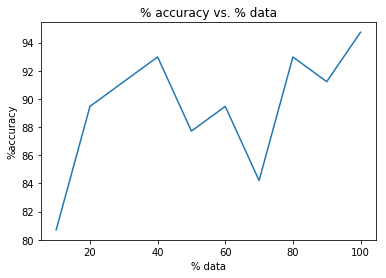

In [19]:
plt.plot(frac,accuracy)
plt.title(s="% accuracy vs. % data")
plt.xlabel(s='% data')
plt.ylabel(s='%accuracy')

 from the above results we get maximum percentage accuracy = 94.7368, from using 100% data with criterion entropy and also from using 90% data with criterion gini. the deciding factor is expansion of tree i.e. no of nodes and no. of leaves. for 100% data with criterion entropy no. of nodes and no of leaves are 29 and 15 respectively. whereas for 90% data with criterion gini , no of nodes and no. of leaves are 27 and 14 respectively.                                                  from this comparison, we found that using 90% data with criterion gini will be best possible choice for building the classifier tree. 